### The following Installs Requirements.

In [ ]:
%pip install numpy
%pip install matplotlib

In [39]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

### The following Code Creates Box Plots.
#### one plot for each weight, each containing #policies boxes.

In [57]:
##Experiment 5: Created the box plots. Each plot, y-axis:work and x-axis:algs, for one weight.
weight_to_int = {"1.50":0, "2.00":1, '3.00':2, '4.00':3, '5.00':4, '6.00':5, '7.00':6, '8.00':7, '9.00':8, '10.00':9}
int_to_alg = {0:'WA*', 1:'pwXD', 2:'pwXU', 3:'XDP', 4:'XUP', 5:'DSMAP'}
numPolicies = len(int_to_alg)
fileName = 'dao_E8TS30H1.5-results'
Weights = {"1.50":[], "2.00":[], '3.00':[], '4.00':[], '5.00':[], '6.00':[], '7.00':[], '8.00':[], '9.00':[], '10.00':[]}
for w in Weights.values():
    for i in range(numPolicies):
        a = []
        w.append(a)

cnt = 0
with open("./results/"+fileName+".txt", "r") as f:
    numLines = len(f.readlines())
with open("./results/"+fileName+".txt", "r") as f:
    for line in f:
        data = line.split()
        if(len(data)): ## To check for empy lines
            if data[0] == "MAP" and (data[7] in list(weight_to_int.keys())) and (int(data[5]) in list(int_to_alg.keys())):
                Weights[data[7]][int(data[5])].append(int(data[9]))
            if data[0] == "STP" and (data[5] in list(weight_to_int.keys())) and (int(data[3]) in list(int_to_alg.keys())):
                Weights[data[5]][int(data[3])].append(int(data[7]))

        cnt += 1
        if cnt/numLines*100 % 10 == 0:
            print(cnt/numLines*100, '%')
print("Done Reading the Data..")

50.0 %
100.0 %
Done Reading the Data..


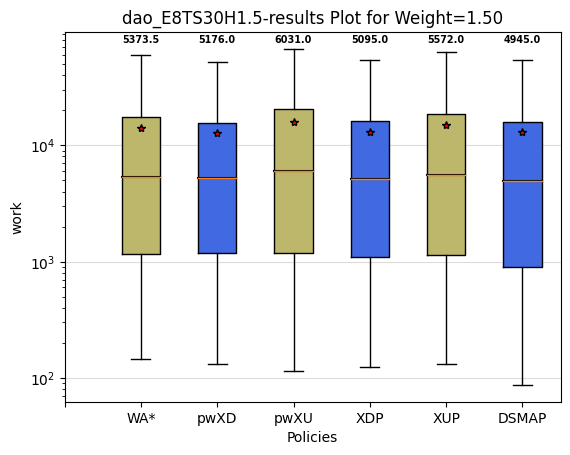

Box information:
 Policy WA*
 median 5373.5
 upper_quartile 17361.75
 lower_quartile 1163.0
 upper_whisker 41659
 lower_whisker 23

 Policy pwXD
 median 5176.0
 upper_quartile 15639.75
 lower_quartile 1195.0
 upper_whisker 37305
 lower_whisker 15

 Policy pwXU
 median 6031.0
 upper_quartile 20431.0
 lower_quartile 1186.0
 upper_whisker 49298
 lower_whisker 21

 Policy XDP
 median 5095.0
 upper_quartile 16200.75
 lower_quartile 1090.0
 upper_whisker 38866
 lower_whisker 20

 Policy XUP
 median 5572.0
 upper_quartile 18695.5
 lower_quartile 1129.0
 upper_whisker 45043
 lower_whisker 24

 Policy DSMAP
 median 4945.0
 upper_quartile 15957.0
 lower_quartile 905.0
 upper_whisker 38533
 lower_whisker 17



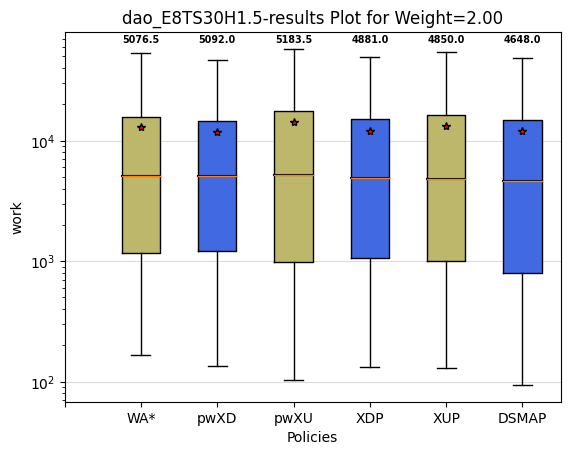

Box information:
 Policy WA*
 median 5076.5
 upper_quartile 15652.0
 lower_quartile 1179.0
 upper_whisker 37361
 lower_whisker 24

 Policy pwXD
 median 5092.0
 upper_quartile 14677.75
 lower_quartile 1223.0
 upper_whisker 34854
 lower_whisker 13

 Policy pwXU
 median 5183.5
 upper_quartile 17775.75
 lower_quartile 981.0
 upper_whisker 42966
 lower_whisker 23

 Policy XDP
 median 4881.0
 upper_quartile 15015.75
 lower_quartile 1071.0
 upper_whisker 35931
 lower_whisker 22

 Policy XUP
 median 4850.0
 upper_quartile 16239.0
 lower_quartile 1001.0
 upper_whisker 39096
 lower_whisker 24

 Policy DSMAP
 median 4648.0
 upper_quartile 14823.75
 lower_quartile 797.0
 upper_whisker 35863
 lower_whisker 13



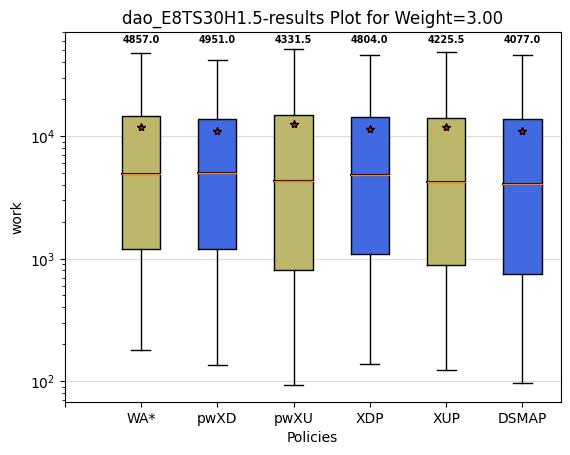

Box information:
 Policy WA*
 median 4857.0
 upper_quartile 14550.0
 lower_quartile 1193.0
 upper_whisker 34583
 lower_whisker 26

 Policy pwXD
 median 4951.0
 upper_quartile 13856.0
 lower_quartile 1197.0
 upper_whisker 32841
 lower_whisker 13

 Policy pwXU
 median 4331.5
 upper_quartile 14965.0
 lower_quartile 803.0
 upper_whisker 36207
 lower_whisker 23

 Policy XDP
 median 4804.0
 upper_quartile 14289.0
 lower_quartile 1082.0
 upper_whisker 34099
 lower_whisker 23

 Policy XUP
 median 4225.5
 upper_quartile 14032.0
 lower_quartile 885.0
 upper_whisker 33749
 lower_whisker 24

 Policy DSMAP
 median 4077.0
 upper_quartile 13873.0
 lower_quartile 753.0
 upper_whisker 33552
 lower_whisker 14



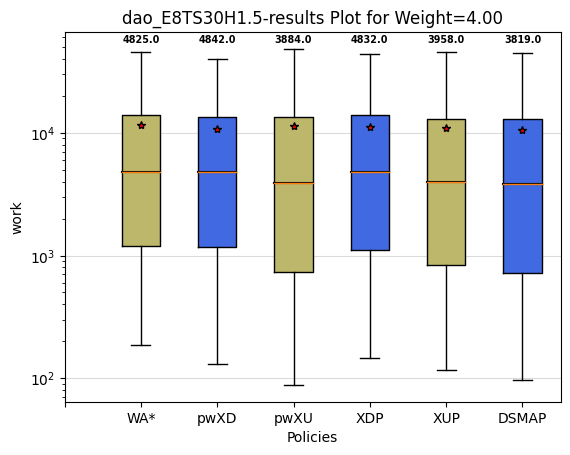

Box information:
 Policy WA*
 median 4825.0
 upper_quartile 14107.0
 lower_quartile 1196.0
 upper_whisker 33473
 lower_whisker 28

 Policy pwXD
 median 4842.0
 upper_quartile 13481.0
 lower_quartile 1168.0
 upper_whisker 31948
 lower_whisker 11

 Policy pwXU
 median 3884.0
 upper_quartile 13574.0
 lower_quartile 729.0
 upper_whisker 32841
 lower_whisker 23

 Policy XDP
 median 4832.0
 upper_quartile 14069.0
 lower_quartile 1118.0
 upper_whisker 33495
 lower_whisker 19

 Policy XUP
 median 3958.0
 upper_quartile 13056.0
 lower_quartile 833.0
 upper_whisker 31387
 lower_whisker 24

 Policy DSMAP
 median 3819.0
 upper_quartile 12874.75
 lower_quartile 724.0
 upper_whisker 31100
 lower_whisker 11



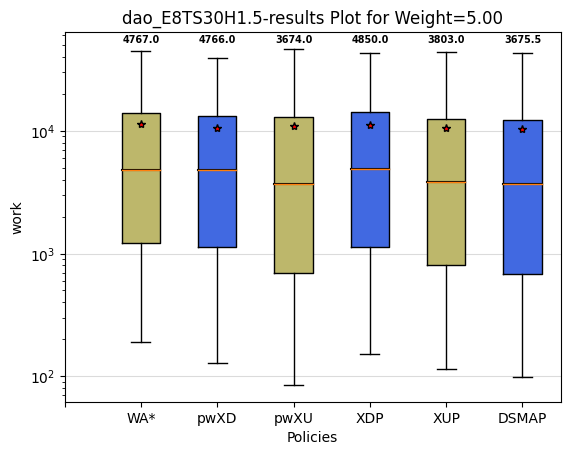

Box information:
 Policy WA*
 median 4767.0
 upper_quartile 13990.0
 lower_quartile 1218.25
 upper_whisker 33147
 lower_whisker 28

 Policy pwXD
 median 4766.0
 upper_quartile 13248.75
 lower_quartile 1136.0
 upper_whisker 31415
 lower_whisker 15

 Policy pwXU
 median 3674.0
 upper_quartile 12834.0
 lower_quartile 691.0
 upper_whisker 31048
 lower_whisker 23

 Policy XDP
 median 4850.0
 upper_quartile 14103.75
 lower_quartile 1140.0
 upper_whisker 33548
 lower_whisker 24

 Policy XUP
 median 3803.0
 upper_quartile 12527.0
 lower_quartile 805.0
 upper_whisker 30110
 lower_whisker 24

 Policy DSMAP
 median 3675.5
 upper_quartile 12230.75
 lower_quartile 683.0
 upper_whisker 29552
 lower_whisker 11



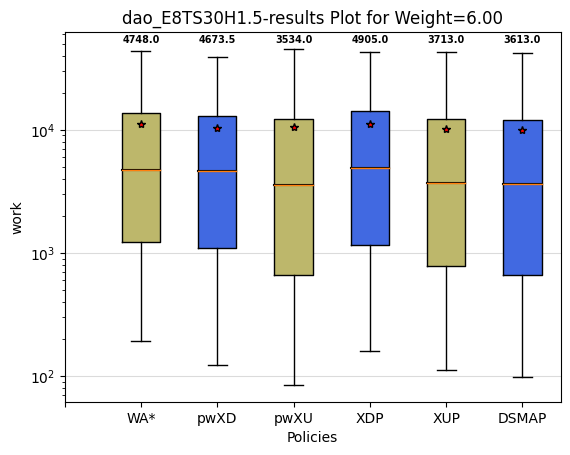

Box information:
 Policy WA*
 median 4748.0
 upper_quartile 13783.0
 lower_quartile 1225.0
 upper_whisker 32619
 lower_whisker 30

 Policy pwXD
 median 4673.5
 upper_quartile 13024.75
 lower_quartile 1101.25
 upper_whisker 30907
 lower_whisker 9

 Policy pwXU
 median 3534.0
 upper_quartile 12326.0
 lower_quartile 662.0
 upper_whisker 29822
 lower_whisker 23

 Policy XDP
 median 4905.0
 upper_quartile 14110.0
 lower_quartile 1167.0
 upper_whisker 33522
 lower_whisker 19

 Policy XUP
 median 3713.0
 upper_quartile 12247.75
 lower_quartile 785.0
 upper_whisker 29441
 lower_whisker 24

 Policy DSMAP
 median 3613.0
 upper_quartile 11936.75
 lower_quartile 657.0
 upper_whisker 28856
 lower_whisker 11



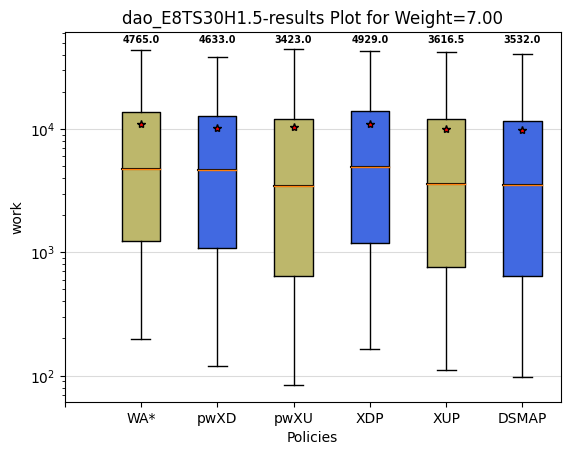

Box information:
 Policy WA*
 median 4765.0
 upper_quartile 13822.0
 lower_quartile 1237.0
 upper_whisker 32699
 lower_whisker 29

 Policy pwXD
 median 4633.0
 upper_quartile 12884.75
 lower_quartile 1084.0
 upper_whisker 30585
 lower_whisker 21

 Policy pwXU
 median 3423.0
 upper_quartile 12110.75
 lower_quartile 647.0
 upper_whisker 29303
 lower_whisker 23

 Policy XDP
 median 4929.0
 upper_quartile 14102.0
 lower_quartile 1181.0
 upper_whisker 33479
 lower_whisker 19

 Policy XUP
 median 3616.5
 upper_quartile 12012.0
 lower_quartile 765.0
 upper_whisker 28881
 lower_whisker 24

 Policy DSMAP
 median 3532.0
 upper_quartile 11636.0
 lower_quartile 646.0
 upper_whisker 28121
 lower_whisker 11



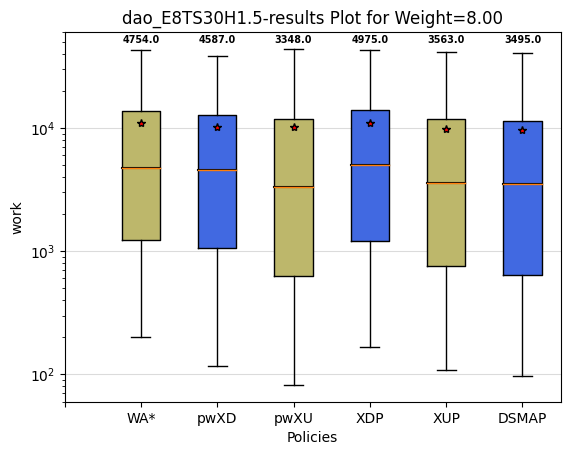

Box information:
 Policy WA*
 median 4754.0
 upper_quartile 13684.75
 lower_quartile 1238.0
 upper_whisker 32353
 lower_whisker 32

 Policy pwXD
 median 4587.0
 upper_quartile 12774.0
 lower_quartile 1070.25
 upper_whisker 30329
 lower_whisker 10

 Policy pwXU
 median 3348.0
 upper_quartile 11772.0
 lower_quartile 629.0
 upper_whisker 28486
 lower_whisker 20

 Policy XDP
 median 4975.0
 upper_quartile 14114.0
 lower_quartile 1208.0
 upper_whisker 33473
 lower_whisker 21

 Policy XUP
 median 3563.0
 upper_quartile 11822.75
 lower_quartile 751.0
 upper_whisker 28430
 lower_whisker 23

 Policy DSMAP
 median 3495.0
 upper_quartile 11486.75
 lower_quartile 638.0
 upper_whisker 27759
 lower_whisker 23



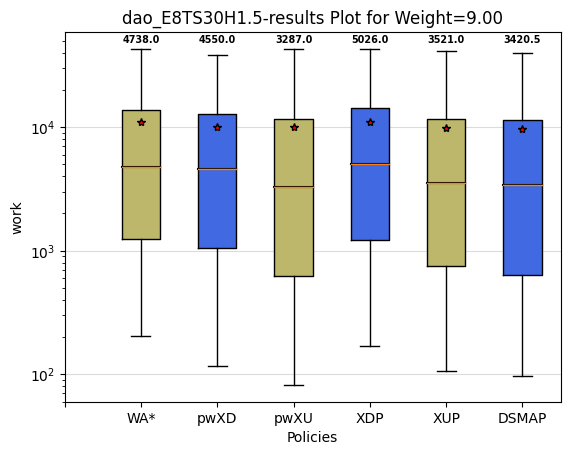

Box information:
 Policy WA*
 median 4738.0
 upper_quartile 13679.0
 lower_quartile 1247.0
 upper_whisker 32324
 lower_whisker 27

 Policy pwXD
 median 4550.0
 upper_quartile 12761.0
 lower_quartile 1053.0
 upper_whisker 30323
 lower_whisker 10

 Policy pwXU
 median 3287.0
 upper_quartile 11599.0
 lower_quartile 620.0
 upper_whisker 28067
 lower_whisker 21

 Policy XDP
 median 5026.0
 upper_quartile 14166.75
 lower_quartile 1226.0
 upper_whisker 33575
 lower_whisker 19

 Policy XUP
 median 3521.0
 upper_quartile 11666.0
 lower_quartile 745.0
 upper_whisker 28047
 lower_whisker 25

 Policy DSMAP
 median 3420.5
 upper_quartile 11380.0
 lower_quartile 639.0
 upper_whisker 27491
 lower_whisker 20



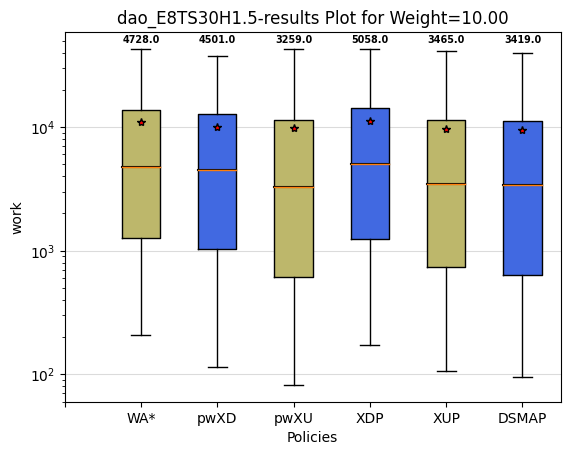

Box information:
 Policy WA*
 median 4728.0
 upper_quartile 13618.75
 lower_quartile 1255.0
 upper_whisker 32162
 lower_whisker 33

 Policy pwXD
 median 4501.0
 upper_quartile 12632.75
 lower_quartile 1040.0
 upper_whisker 30021
 lower_whisker 10

 Policy pwXU
 median 3259.0
 upper_quartile 11413.0
 lower_quartile 615.0
 upper_whisker 27610
 lower_whisker 21

 Policy XDP
 median 5058.0
 upper_quartile 14253.0
 lower_quartile 1246.0
 upper_whisker 33761
 lower_whisker 21

 Policy XUP
 median 3465.0
 upper_quartile 11507.0
 lower_quartile 733.0
 upper_whisker 27668
 lower_whisker 24

 Policy DSMAP
 median 3419.0
 upper_quartile 11264.5
 lower_quartile 638.0
 upper_whisker 27203
 lower_whisker 14



In [58]:
for w in range(len(Weights.values())):
    data = []
    for alg in list(Weights.values())[w]:
        data.append(np.array(alg))

    fig, ax = plt.subplots()

    bp = ax.boxplot(data, showfliers=False, notch=False, sym='+', vert=True, whis=(5,95))
    # bp = ax.boxplot(data, showfliers=False, notch=False, sym='+', vert=True, whis=1.5)
    ax.set_yscale('log')
    
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.8)
    ax.set(
        axisbelow=True,  # Hide the grid behind plot objects
        title=fileName + ' Plot for Weight=' + list(Weights.keys())[w],
        xlabel='Policies',
        ylabel='work',
    )

    box_colors = ['darkkhaki', 'royalblue']
    num_boxes = len(data)
    medians = np.empty(num_boxes)
    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
        for j in range(5):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        # Alternate between Dark Khaki and Royal Blue
        ax.add_patch(Polygon(box_coords, facecolor=box_colors[i % 2]))
        # Now draw the median lines back over what we just filled in
        med = bp['medians'][i]
        median_x = []
        median_y = []
        for j in range(2):
            median_x.append(med.get_xdata()[j])
            median_y.append(med.get_ydata()[j])
            ax.plot(median_x, median_y, 'k')
        medians[i] = median_y[0]
        # Finally, overplot the sample averages, with horizontal alignment
        # in the center of each box
        ax.plot(np.average(med.get_xdata()), np.average(data[i]),
                color='r', marker='*', markeredgecolor='k')
        
    # Due to the Y-axis scale being different across samples, it can be
    # hard to compare differences in medians across the samples. Add upper
    # X-axis tick labels with the sample medians to aid in comparison
    # (just use two decimal places of precision)
    pos = np.arange(num_boxes) + 1
    upper_labels = [str(round(s, 2)) for s in medians]
    thickness = ['bold', 'semibold']
    for tick, label in zip(range(num_boxes), ax.get_xticklabels()):

        ax.text(pos[tick], .97, upper_labels[tick],
                transform=ax.get_xaxis_transform(), weight=thickness[1],
                horizontalalignment='center', size='x-small')

    y_pos = np.arange(len(int_to_alg.values())+1)
    labels = ['']
    labels += list(int_to_alg.values())
    plt.xticks(y_pos, labels)

    plt.show()
    print('Box information:')
    for alg in range(len(data)):
        median = np.median(data[alg])
        upper_quartile = np.percentile(data[alg], 75)
        lower_quartile = np.percentile(data[alg], 25)

        iqr = upper_quartile - lower_quartile
        upper_whisker = data[alg][data[alg]<=upper_quartile+1.5*iqr].max()
        lower_whisker = data[alg][data[alg]>=lower_quartile-1.5*iqr].min()

        print(' Policy '+int_to_alg[alg])
        print(' median', median)
        print(' upper_quartile', upper_quartile)
        print(' lower_quartile', lower_quartile)
        print(' upper_whisker', upper_whisker)
        print(' lower_whisker', lower_whisker)
        print()
    print('====================================')